# Introduction

In this project, we will analyze data from a directed marketing campaign of a Portuguese banking institution and build a classification model to predict whether a customer subscribes (yes) or does not subscribe (no) to the product being offered.

The dataset is retrieved from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing#). 

Credits go to:

[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, In press, http://dx.doi.org/10.1016/j.dss.2014.03.001

  Available at: [pdf](http://dx.doi.org/10.1016/j.dss.2014.03.001)
                [bib](http://www3.dsi.uminho.pt/pcortez/bib/2014-dss.txt)


## Importing the Data and Necessary Libraries

In [ ]:
# import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import matplotlib
from matplotlib.pyplot import figure
import seaborn as sns

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
# import the data

filepath = "/content/drive/MyDrive/Educayshion/Colabs/Projects/Bank Marketing/bank-additional-full.csv"
data = pd.read_csv(filepath)

# Data Cleaning and Formatting

In [ ]:
data.head() # look at the first 5 rows

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


The description of the attributes are as follows:

   1. age (numeric)
   2. job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
   3. marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
   4. education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
   5. default: has credit in default? (categorical: "no","yes","unknown")
   6. housing: has housing loan? (categorical: "no","yes","unknown")
   7. loan: has personal loan? (categorical: "no","yes","unknown")

Related with the last contact of the current campaign:

   8. contact: contact communication type (categorical: "cellular","telephone") 
   9. month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
   10. day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
   11. duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

Other attributes:

  12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
  14. previous: number of contacts performed before this campaign and for this client (numeric)
  15. poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

Social and economic context attributes:

  16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
  17. cons.price.idx: consumer price index - monthly indicator (numeric)     
  18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
  19. euribor3m: euribor 3 month rate - daily indicator (numeric)
  20. nr.employed: number of employees - quarterly indicator (numeric)

  Output variable (desired target):
  21. y - has the client subscribed a term deposit? (binary: "yes","no")


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

At a glance, we see that there are several categorical attributes that will have to be one-hot coded. Also, following the suggestion in the data description, let's drop the `duration` feature.

In [ ]:
data.drop(columns=['duration'], inplace=True)

## Create Train and Test Set

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2, random_state=42)

## Check for Missing Values

In [ ]:
train.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Well that was easy! No missing values!....

Or so we think: 
"Missing Attribute Values: There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques." - from the data description.

Let's be more through about this.

In [ ]:
train.replace('unknown', np.nan, inplace=True)
train.isnull().sum()

age                  0
job                262
marital             61
education         1399
default           6857
housing            811
loan               811
contact              0
month                0
day_of_week          0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

Rather than indiscriminately deleting all these rows or even the attributes themselves, let's examine further to see if we can apply some kind of imputation.

In [ ]:
# Percent of missing values
missing_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan']
train[missing_cols].isnull().sum() * 100/len(train)

job           0.795144
marital       0.185129
education     4.245827
default      20.810319
housing       2.461305
loan          2.461305
dtype: float64

`job`, `marital`, `housing`, `education`, and `loan` all have very low percentage of missing values, so we will impute using the mode, and it will not imbalance the data.

In [ ]:
modes = train[['job', 'marital', 'education','housing', 'loan']].mode()
for col in ['job', 'marital', 'education','housing', 'loan']:
    mode = modes[col][0]
    train[col].fillna(mode, inplace=True)

In [ ]:
train.isnull().sum()

age                  0
job                  0
marital              0
education            0
default           6857
housing              0
loan                 0
contact              0
month                0
day_of_week          0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

Now, let's look at `default` and see how we can deal with it.

In [ ]:
train['default'].value_counts()

no     26090
yes        3
Name: default, dtype: int64

With such an imbalanced distribution, we will also impute `default` using the mode, since we can't remove 21% of the train data, and we can't build a model to predict if `default` = `yes` since there are only 3 instances of `yes`.

In [ ]:
default_mode = train['default'].mode()[0]
train['default'].fillna(default_mode, inplace=True)

In [ ]:
train.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Before we move on, let's convert the `y` target feature from 'yes'/'no' to 1/0 for easier exploration.

In [ ]:
train['y'] = (train['y'] == 'yes').astype(int)
train['y'].value_counts()

0    29245
1     3705
Name: y, dtype: int64

## Exploratory Data Analysis and Feature Engineering

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32950 entries, 12556 to 15795
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32950 non-null  int64  
 1   job             32950 non-null  object 
 2   marital         32950 non-null  object 
 3   education       32950 non-null  object 
 4   default         32950 non-null  object 
 5   housing         32950 non-null  object 
 6   loan            32950 non-null  object 
 7   contact         32950 non-null  object 
 8   month           32950 non-null  object 
 9   day_of_week     32950 non-null  object 
 10  campaign        32950 non-null  int64  
 11  pdays           32950 non-null  int64  
 12  previous        32950 non-null  int64  
 13  poutcome        32950 non-null  object 
 14  emp.var.rate    32950 non-null  float64
 15  cons.price.idx  32950 non-null  float64
 16  cons.conf.idx   32950 non-null  float64
 17  euribor3m       32950 non-n

In [ ]:
num_cols = train.select_dtypes(include=np.number).columns.tolist()
cat_cols = train.select_dtypes(exclude=np.number).columns.tolist()

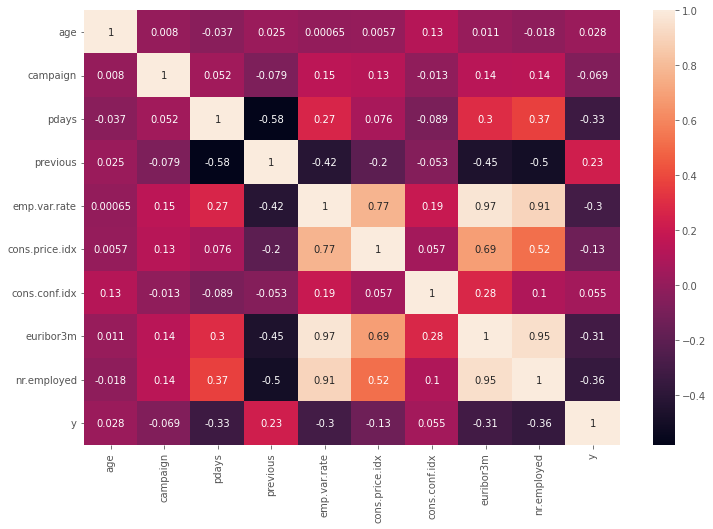

In [ ]:
sns.heatmap(train.corr(), annot=True); # Plot heatmap correlation matrix

Looking at the above heatmap, we see there are some highly correlated features, some of which we will drop.

### Remove Collinearity

In [ ]:
upper_tri = train.drop(columns=['y']).corr().where(np.triu(np.ones(train.drop(columns=['y']).corr().shape),k=1).astype(bool))
upper_tri

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,NaN,0.008029,-0.037208,0.024633,0.000654,0.005697,0.127198,0.011134,-0.018016
campaign,NaN,NaN,0.052099,-0.078620,0.151636,0.128344,-0.012813,0.135814,0.144363
pdays,NaN,NaN,NaN,-0.582945,0.270013,0.075696,-0.089145,0.296115,0.371983
previous,NaN,NaN,NaN,NaN,-0.421517,-0.204443,-0.052983,-0.454779,-0.500264
emp.var.rate,NaN,NaN,NaN,NaN,NaN,0.773785,0.194588,0.972084,0.906823
cons.price.idx,NaN,NaN,NaN,NaN,NaN,NaN,0.057473,0.685909,0.519529
cons.conf.idx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.276002,0.099884
euribor3m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.945543
nr.employed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)] # drop features with more than 0.9 correlation
to_drop # the numeric columns we will drop

['euribor3m', 'nr.employed']

In [ ]:
train.drop(columns=to_drop, inplace=True) # dropping highly correlated features

In [ ]:
train.drop(columns=['y']).corr().where(np.triu(np.ones(train.drop(columns=['y']).corr().shape),k=1).astype(bool))

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx
age,NaN,0.008029,-0.037208,0.024633,0.000654,0.005697,0.127198
campaign,NaN,NaN,0.052099,-0.078620,0.151636,0.128344,-0.012813
pdays,NaN,NaN,NaN,-0.582945,0.270013,0.075696,-0.089145
previous,NaN,NaN,NaN,NaN,-0.421517,-0.204443,-0.052983
emp.var.rate,NaN,NaN,NaN,NaN,NaN,0.773785,0.194588
cons.price.idx,NaN,NaN,NaN,NaN,NaN,NaN,0.057473
cons.conf.idx,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
num_cols.remove(to_drop[0])

In [ ]:
num_cols.remove(to_drop[1])

In [ ]:
num_cols

['age',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'y']

### Investigating relationship between categorical features

We already examined the distribution of some categorical features earlier. Now, let's dig deeper into it.

In [ ]:
train['y'].value_counts()/len(train)

0    0.887557
1    0.112443
Name: y, dtype: float64

The target feature is heavily skewed towards 0, so later when we train ML models on this dataset, we can't use accuracy score as our metric.

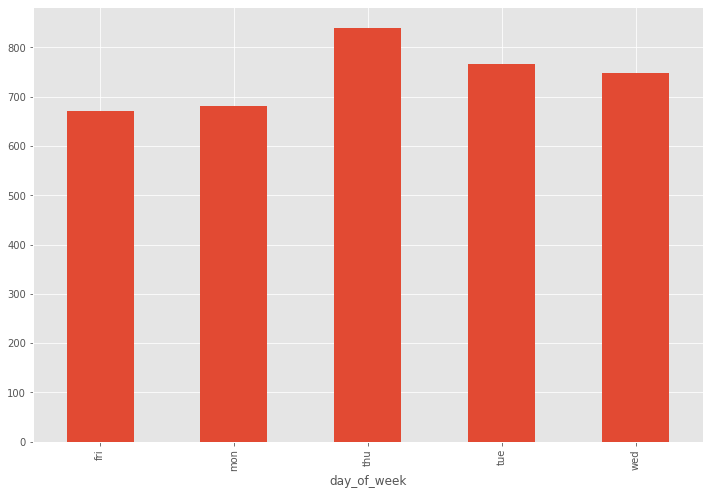

In [ ]:
train.groupby(by='day_of_week').sum()['y'].plot(kind='bar')

There seems to be somewhat of a peak on Thursday that the campaign succeeds, but the distribution looks roughly uniform. We can test out if this assumption is accurate.

In [ ]:
import scipy.stats as stats

observed = list(train.groupby(by='day_of_week').sum()['y'])
expected = [sum(train['y'])/5 for i in range(5)]

In [ ]:
chi_sq_test_stat, p_value = stats.chisquare(observed, expected) # chi-squared goodness-of-fit test
p_value

3.4762060957010215e-05

In fact, since the p-value is less than 0.05, we cannot assume the distribution of campaign successes over weekdays is uniform.

In [ ]:
stats.chi2_contingency(pd.crosstab(train['day_of_week'], train['y'])) # test for independence

(20.845841968316055,
 0.00033975049951595084,
 4,
 array([[5564.09423369,  704.90576631],
        [6029.17405159,  763.82594841],
        [6099.29104704,  772.70895296],
        [5780.65811836,  732.34188164],
        [5771.78254932,  731.21745068]]))

Indeed, these 2 features are not independent either, with the p-value being less than 0.05.

Let's test each categorical feature to see if they are independent of the target feature. We choose a significance level of 0.05.

In [ ]:
alpha = 0.05
p_vals = [stats.chi2_contingency(pd.crosstab(train[col], train['y']))[1] for col in cat_cols]
np.array(cat_cols)[np.array(p_vals) < alpha] # Features that have a statistically significant relationship with the target feature

array(['job', 'marital', 'education', 'housing', 'contact', 'month',
       'day_of_week', 'poutcome'], dtype='<U11')

In [ ]:
cat_to_drop = np.array(cat_cols)[np.array(p_vals) >= alpha]
cat_to_drop # we will drop these categorical features

array(['default', 'loan'], dtype='<U11')

In [ ]:
train.drop(columns=cat_to_drop, inplace=True)
train.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'contact', 'month',
       'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'y'],
      dtype='object')

In [ ]:
cat_cols = np.array(cat_cols)[np.array(p_vals) < alpha] # reassign the remaining categorical features to cat_cols

### OneHot Encoding of Categorical Features

Now, let's perform One-Hot Encoding on the remaining categorical features.

In [ ]:
train = pd.get_dummies(train)

In [ ]:
train.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,housing_no,housing_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
12556,40,2,999,0,1.4,93.918,-42.7,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
35451,31,4,999,0,-1.8,92.893,-46.2,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
30592,59,6,999,1,-1.8,92.893,-46.2,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
17914,43,5,999,0,1.4,93.918,-42.7,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3315,39,2,999,0,1.1,93.994,-36.4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0


## Create Data Preprocessing Pipeline

We will use pipeline in scikitlearnt to create a pipeline object to preprocess data.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

There are several things this pipeline will have to do:
1. Encode "unknown" as `np.nan` and impute the missing values.
2. Drop highly correlated numeric features and categorical features that are independent with the target feature.
3. OneHot Encode remaining categorical features.
4. Normalize remaining numeric features.

In [ ]:
# Let's now recreate our train and test set, separating the features and the target
X = data.drop(columns=['y'])
y = data['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
class unknown_converter(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X.replace('unknown', np.nan)

In [ ]:
# Create a custom transfomer to remove features

class AttrRemover(BaseEstimator, TransformerMixin):
    def __init__(self, remove=None):
        if remove:
            self.remove = remove
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        if self.remove:
            for col in self.remove:
                if col in X.columns:
                    X.drop(columns=[col], inplace=True)
            return X
        return X

In [ ]:
to_drop = ['default', 'loan', 'euribor3m', 'nr.employed']

In [ ]:
num_features = X.drop(columns=to_drop).select_dtypes(include=np.number).columns.to_list()
cat_features = X.drop(columns=to_drop).select_dtypes(exclude=np.number).columns.to_list()
print(num_features)
print(cat_features)

['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx']
['job', 'marital', 'education', 'housing', 'contact', 'month', 'day_of_week', 'poutcome']


In [ ]:
cat_idx = [7,8,9,10,11,12,13,14] # we need to remove categorical features after we encode them
                                 # these values are derived after testing out the initial pipeline
cat_idx

[7, 8, 9, 10, 11, 12, 13, 14]

In [ ]:
class CatRemover(BaseEstimator, TransformerMixin): # remove categorical features once we've onehot encoded them
    def __init__(self, remove=None):
        if remove:
            self.remove = remove
    def fit(self, X, y=None):
        return self
    def transform(self, X):
         if self.remove:
            return np.delete(X, self.remove, axis=1)  

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

transformation_pipeline = ColumnTransformer([
    ('num', StandardScaler(), num_features), # normalize numeric features
    ('cat_impute', SimpleImputer(strategy='most_frequent'), cat_features), # impute missing values in categorical features
    ('cat', OneHotEncoder(), cat_features) # one-hot encode categorical features
])

In [ ]:
full_pipeline = Pipeline([
    ('unknown_converter', unknown_converter()),
    ('initialremover', AttrRemover(remove=to_drop)),
    ('transformation', transformation_pipeline),
    ('cat_remover', CatRemover(remove=cat_idx))
])

In [ ]:
X_train = full_pipeline.fit_transform(X_train) # this is a Numpy array

In [ ]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53
0,-0.001669,-0.206242,0.194661,-0.350902,0.838794,0.58908,-0.472769,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.864095,0.513676,0.194661,-0.350902,-1.19944,-1.18076,-1.229916,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.819007,1.233593,0.194661,1.677559,-1.19944,-1.18076,-1.229916,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.285806,0.873635,0.194661,-0.350902,0.838794,0.58908,-0.472769,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,-0.097494,-0.206242,0.194661,-0.350902,0.647709,0.720307,0.890097,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


Lastly, let's convert our target feature into 0 and 1.

In [ ]:
y_train = (y_train == 'yes')
y_test = (y_test == 'yes')

## Model Building

Before we start testing any model, we need to choose an appropriate benchmark for evaluation. Since the target feature is heavily skewed towards 1 class, we can't use accuracy score.

In [ ]:
y_train.value_counts()/len(y_train)

False    0.887557
True     0.112443
Name: y, dtype: float64

Indeed, we can create a completely stupid classifier that will have a great accuracy score just as follows.

In [ ]:
class no_classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [ ]:
from sklearn.model_selection import cross_val_score

always_no_classifier = no_classifier()
cross_val_score(always_no_classifier, X_train, y_train, cv=3, scoring='accuracy')

array([0.89002185, 0.88564145, 0.88700719])

As seen above, a nonsensical classifier that always predicts 'no' gives us an accuracy score around 89%. So accuracy score is not a very good metric to use. In this case, we will use recall as our performance metric. The reason for this is that in our context, misclassifying some rows as `no` does not have much consequence for the business, since the target feature is skewed heavily towards `no` anyways. However, since there are so few `yes` instances, recall would be an appropriate metric. Let's first create a completely random classifier to set a benchmark that we must do better.

In [ ]:
class BernoulliClassifier(BaseEstimator): # Create a random classifier that we have to beat
    def __init__(self, prob):
        self.prob = prob
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.random.binomial(1, self.prob, size=len(X))

In [ ]:
prob = (y_train.value_counts()/len(y_train))[1] # choose the proportion of 'yes' to be our probability

In [ ]:
from sklearn.metrics import recall_score

In [ ]:
random_clf = BernoulliClassifier(prob)
random_y_preds = random_clf.predict(X_train)
recall_score(y_train, random_y_preds)

0.11929824561403508

I mean that is ridiculously low we have to beat it! That said, however, the dataset is heavily imbalanced towards the 'no's, so the classifiers may not work well and we will have to do some resampling. For now, let's just test out some classifiers and check their performances.

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
cross_val_score(rf_clf, X_train, y_train, cv=5, scoring='recall')

array([0.29554656, 0.28879892, 0.28744939, 0.28609987, 0.3265857 ])

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logit_clf = LogisticRegression()
cross_val_score(logit_clf, X_train, y_train, cv=5, scoring='recall')

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


array([0.24426451, 0.24291498, 0.23346829, 0.2294197 , 0.23346829])

In [ ]:
# SGD
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier()
cross_val_score(sgd_clf, X_train, y_train, cv=5, scoring='recall')

array([0.22672065, 0.21187584, 0.04048583, 0.18353576, 0.03508772])

That's enough testing to see that we really need to deal with the imbalance in our dataset first. Since our dataset isn't very large, we will perform oversampling to deal with the imbalance.

## Oversampling to Deal with Data Imbalance

### Random Oversampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

In [ ]:
# Random Forest
rf_clf = RandomForestClassifier()
cross_val_score(rf_clf, X_train_ros, y_train_ros, cv=5, scoring='recall')

array([0.99880321, 0.99965806, 1.        , 0.99965806, 1.        ])

Already much better! But this definitely looks like overfitting, so we will try SMOTE instead.

### SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
# Random Forest
rf_clf = RandomForestClassifier()
cross_val_score(rf_clf, X_train_smote, y_train_smote, cv=5, scoring='recall')

array([0.66113866, 0.99316122, 0.99264832, 0.99247735, 0.99367413])

This looks more reasonable. Since the recall score of 4 out of 5 fold is already 99%, we will not tune the hyper parameters to avoid overfitting.

In [ ]:
rf_clf.fit(X_train_smote, y_train_smote)

RandomForestClassifier()

In [ ]:
# Test out model on test set
X_test_prep = full_pipeline.transform(X_test)

In [ ]:
y_test_preds = rf_clf.predict(X_test_prep)

In [ ]:
recall_score(y_test, y_test_preds)

0.3336898395721925

In [ ]:
# Logistic Regression
logit_clf = LogisticRegression()
cross_val_score(logit_clf, X_train_smote, y_train_smote, cv=5, scoring='recall')

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


array([0.63942554, 0.64780304, 0.63224483, 0.63395452, 0.63925457])

In [ ]:
logit_clf.fit(X_train_smote, y_train_smote)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
y_logit_preds = logit_clf.predict(X_test_prep)
recall_score(y_test, y_logit_preds)

0.6085561497326203

In [ ]:
# SGD
sgd_clf = SGDClassifier()
cross_val_score(sgd_clf, X_train_smote, y_train_smote, cv=5, scoring='recall')

array([0.64711917, 0.62078988, 0.61104462, 0.61189947, 0.61121559])

Looks like SGD is our most promising model. Let's do some hyperparameter tuning on this.

In [ ]:
from sklearn.model_selection import GridSearchCV

grid = {
    'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], 
    'max_iter': [1000], 
    'loss': ['log'], 
    'penalty': ['l2'],
    'n_jobs': [-1]
}

grid_search = GridSearchCV(sgd_clf, grid, cv=5 ,scoring='recall', return_train_score=True)



In [ ]:
grid_search.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=5, estimator=SGDClassifier(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0,
                                   1000.0],
                         'loss': ['log'], 'max_iter': [1000], 'n_jobs': [-1],
                         'penalty': ['l2']},
             return_train_score=True, scoring='recall')

In [ ]:
grid_search.best_estimator_

SGDClassifier(alpha=0.1, loss='log', n_jobs=-1)

In [ ]:
grid_search_best_sgd = grid_search.best_estimator_
cross_val_score(grid_search_best_sgd, X_train_smote, y_train_smote, cv=5, scoring='recall')

array([0.6849034 , 0.6932809 , 0.67738075, 0.68285177, 0.68951958])

In [ ]:
# Test out the model on the test set
grid_search_best_sgd.fit(X_train_smote, y_train_smote)
y_sgd_preds = grid_search_best_sgd.predict(X_test_prep)
recall_score(y_test, y_sgd_preds)

0.679144385026738

That is pretty good! Let's save this model so it's easier to use it for deployment.

In [ ]:
import pickle

pickle.dump(grid_search_best_sgd, open('sgdmodel.pkl', 'wb'))